# Uniform flow problem - Manning's equation

### (1) EXAMPLE 5.1.1 (Water Resources Engineering, Larry W. Mays)

An 8‐ft wide rectangular channel with a bed slope of 0.0004 ft/ft has a depth of flow of 2 ft. Assuming steady uniform flow, determine the discharge in the channel. The Manning roughness coefficient is n = 0.015.

### (2) EXAMPLE 5.1.3

Determine the normal depth (for uniform flow) if the channel described in example 5.1.1 has a flow rate of 100 cfs.

### Solution of 5.1.1: 

Using Manning's equation to solve 5.1.1:

$Q = \frac{1.49}{n} A R^{2/3} S_0^{1/2}$ where $Q$ is discharge, $n$ is Manning's coefficient, $R$ is hydraulic radius, $S_0$ is the slope of channel, 1.49 is the coefficient when using U.S. customary units.

In [1]:
S0 = 0.0004 # channel slope
B = 8 # channel width
y = 2 # normal depth
n = 0.015 # Manning's coefficient

In [5]:
A = y * B 
P = 2*y + B  # wetted perimeter
R = A/P # rectangular channel
Q = 1.49/n * A * R**(2/3) * S0**(1/2)
print('Discharge at water depth of 2 ft is', Q, 'cfs')

Discharge at water depth of 2 ft is 38.50680438499397 cfs


### Solution of 5.1.3:

In Example 5.1.3, we need to solve for nonlinear equation $Q = \frac{1.49}{n} A R^{2/3} S_0^{1/2} = 100$ cfs. This equation can not be directly solved. We have to solve it iteratively. 

In [24]:
# Method 1: Trial and error 

import numpy as np

Qt = 100 # target Q
dy = 0.1
y = 2.0 # initial guess, since at y = 2 ft we have Q = 38.5 cfs, we need to guess a slightly larger value of y
difference = 100
threshold = 1
while difference > threshold:
    y = y + dy
    A = y * B
    P = 2*y + B
    R = A/P
    Q = 1.49/n * A * R**(2/3) * S0**(1/2)
    difference = np.abs(Q-Qt)
    
print('Discharge at water depth of', y, 'ft is 100 cfs')
print('Error is', difference, 'cfs')

Discharge at water depth of 4.000000000000002 ft is 100 cfs
Error is 0.9163762104584094 cfs


When you apply this method, you might find out that this method does not always work. It depends on your selection of $dy$ and the threshold. If you reduce threshold, the search may pass the target discharge, in which case, you end up with an endless loop. There is a method to check - we can plot the relationship between $y$ and $Q$.

Text(0, 0.5, 'Q (cfs)')

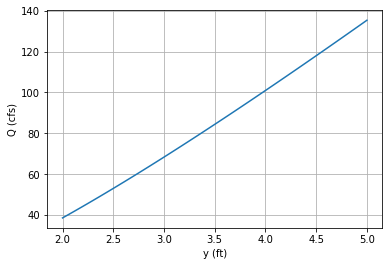

In [25]:
# Method 2: Plot the figure

import matplotlib.pyplot as plt

y = np.linspace(2,5) # select a resonable range
A = y * B
P = 2*y + B
R = A/P
Q = 1.49/n * A * R**(2/3) * S0**(1/2)

plt.plot(y,Q)
plt.grid(True)
plt.xlabel('y (ft)')
plt.ylabel('Q (cfs)')

From the above plot, you can see $y$ is slightly smaller than 4 ft when $Q = 100$ cfs.  

In fact, the above nonlinear equation can be solved using root-finding methods with numerical calculations. To do that, we need to first write out the equation:

$f(y) = \frac{1.49}{n} B y \left( \frac{By}{B+2y}\right)^{2/3}S_0^{1/2} - Q_t = 0$

Plug in numbers, we have:
$f(y) = 15.89y \left( \frac{8y}{8+2y} \right)^{2/3}-100 = 0$

The following code solves the root-finding problem using 'fsolve' function that is built-in in 'scipy' library. 

In [29]:
# Method 3: Numerical method

from scipy.optimize import fsolve

f = lambda y: 15.89 * y * (8*y/ (8+2*y))**(2/3) - 100

fsolve(f, [2, 80])

array([3.97336342, 3.97336342])

The above code solve the equation and return two solutions. They are identical, which is the $y$ value we want to find. You can check the actural discharge: 

In [33]:
y = fsolve(f, [2, 80])[0]
A = y * B
P = 2*y + B
R = A/P
Q = 1.49/n * A * R**(2/3) * S0**(1/2)
print(Q)

100.02097755375904
